### General Description: -
This dataset contains information about employees who worked in a company.

This dataset contains columns: Satisfactory Level, Number of Project, Average Monthly Hours, Time Spend Company, Promotion Last 5 Years, Department, Salary

### Aim: -
- To do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing the impact of employee salaries on retention
- Plot bar charts showing a relation between department and employee retention
- To build a logistic regression model
- Measure the accuracy of the model

### Outline: -
- Import Dataset
- Data Cleaning and Data Preparation
- Exploratory Data Analysis
- Train Test Split
- Model Building
- Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Data Cleaning and Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Exploratory Data Analysis

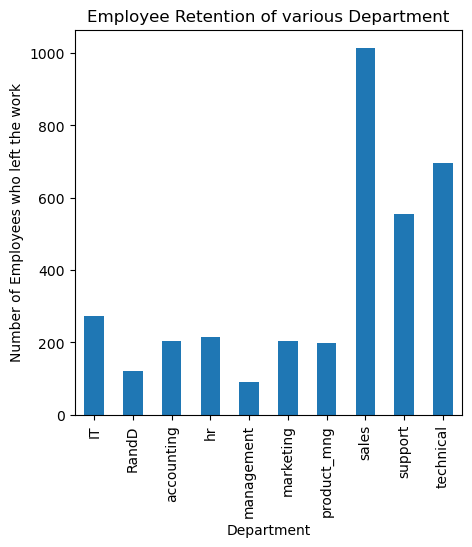

In [7]:
plt.figure(figsize=(5,5))
df.groupby(['Department'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work')
plt.title("Employee Retention of various Department")
plt.show()

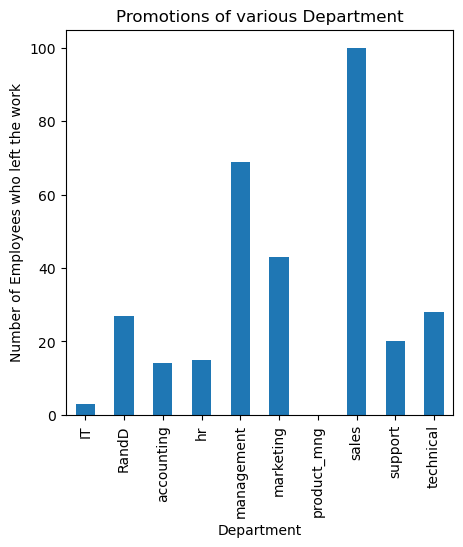

In [8]:
plt.figure(figsize=(5,5))
df.groupby(['Department'])['promotion_last_5years'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work')
plt.title("Promotions of various Department")
plt.show()


#### It can be seen that the maximum number of promotions are in Sales Department, but still the highest number of employee who left the job are from Sales department.

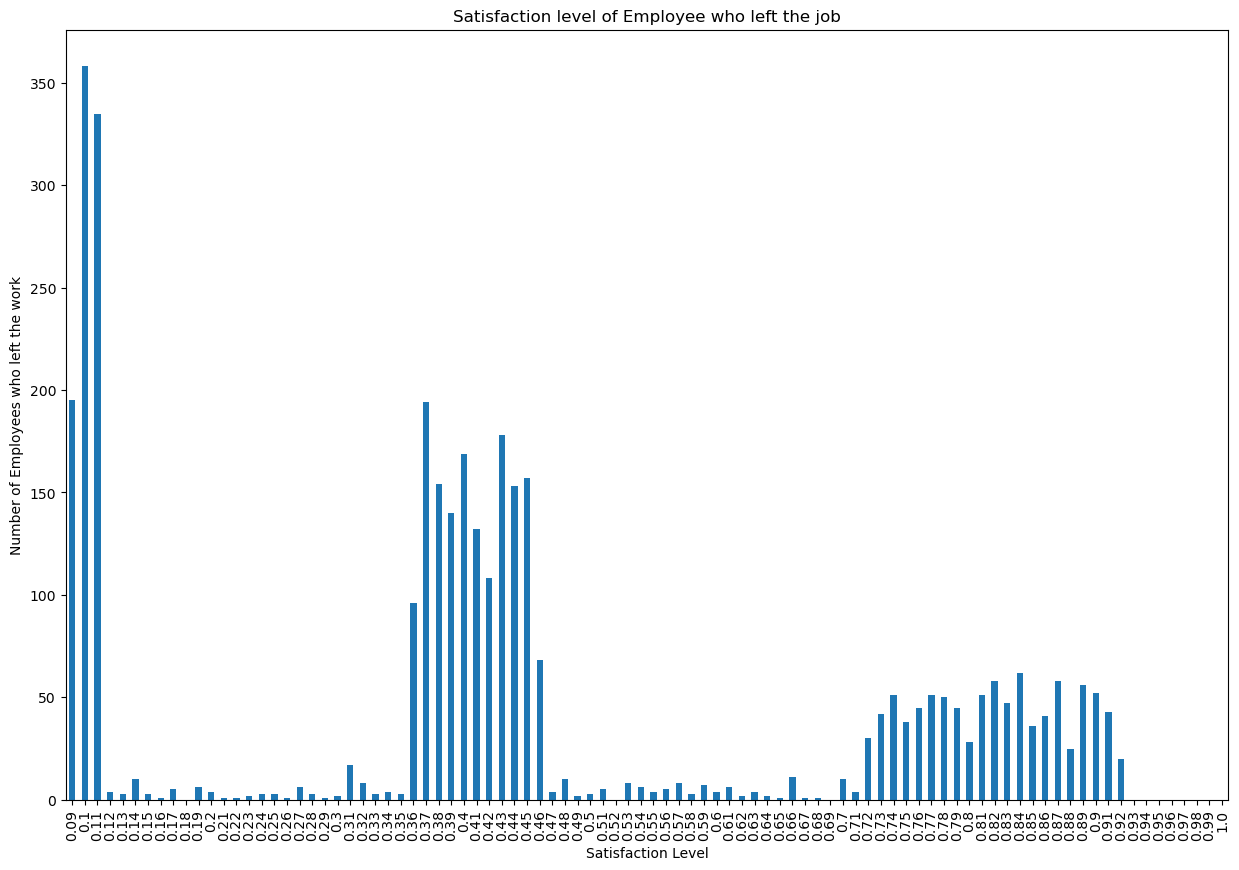

In [9]:
plt.figure(figsize=(15,10))
df.groupby(['satisfaction_level'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work')
plt.xlabel('Satisfaction Level')
plt.title("Satisfaction level of Employee who left the job")

plt.show()

#### Here we can see that most of the Employee who left job was not satisfied and their satisfaction level was below 50% , but a good proportion of employees whose satisfaction level was between 0.7 to 0.95 also left the job.

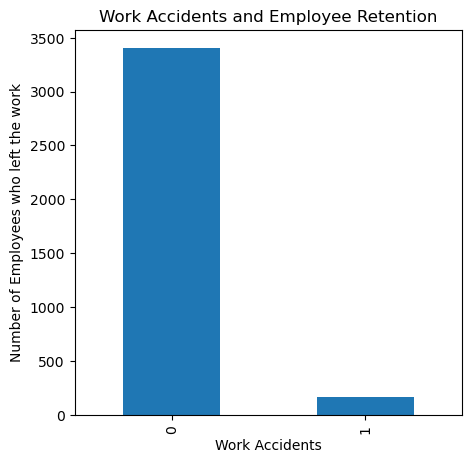

In [10]:
plt.figure(figsize=(5,5)),
df.groupby(['Work_accident'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work')
plt.xlabel('Work Accidents')
plt.title("Work Accidents and Employee Retention")
plt.show()

#### As we can see that work accident is not a major feature which determines Employee Retention as we can see people who have not faced any work accident also left the job.

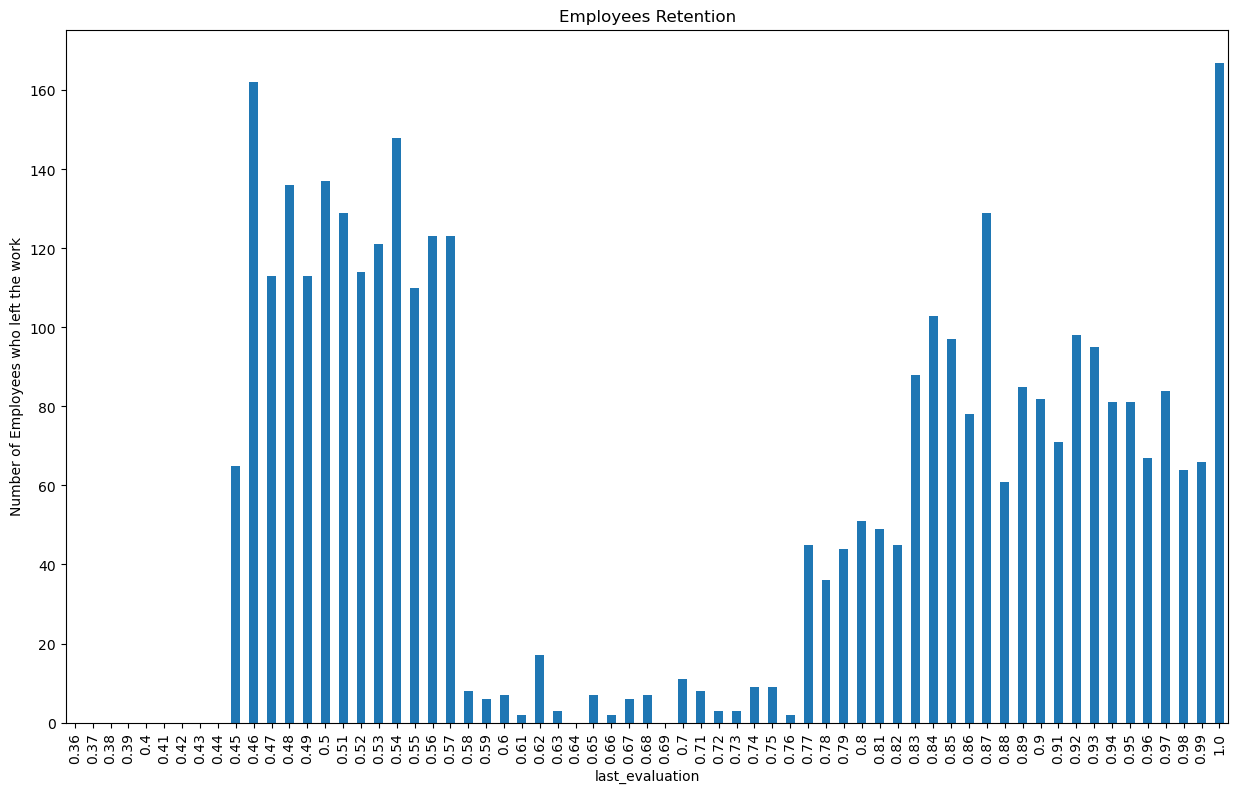

In [11]:
plt.figure(figsize=(15,9))
df.groupby(['last_evaluation'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work')
plt.title("Employees Retention")
plt.show()

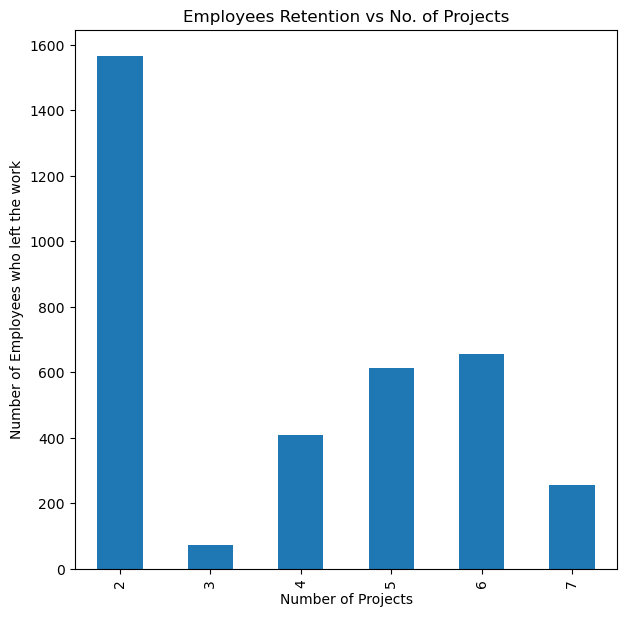

In [12]:
plt.figure(figsize=(7,7)),
df.groupby(['number_project'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work')
plt.xlabel('Number of Projects')
plt.title("Employees Retention vs No. of Projects")
plt.show()

#### Most of the pepole who left the job have done 2 or less than 2 projects

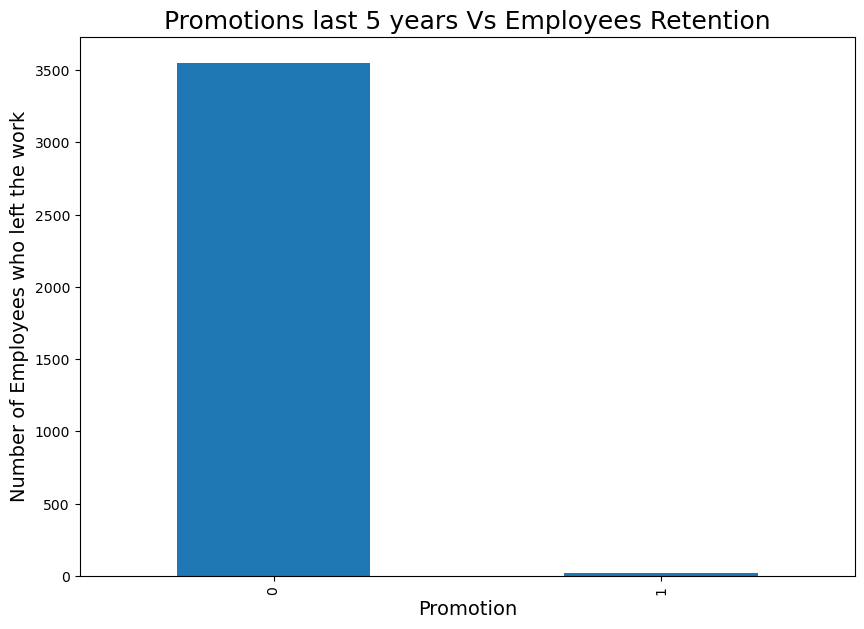

In [13]:
plt.figure(figsize=(10,7)),
df.groupby(['promotion_last_5years'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work', fontsize=14)
plt.xlabel('Promotion', fontsize =14)
plt.title("Promotions last 5 years Vs Employees Retention",fontsize=18)
plt.show()


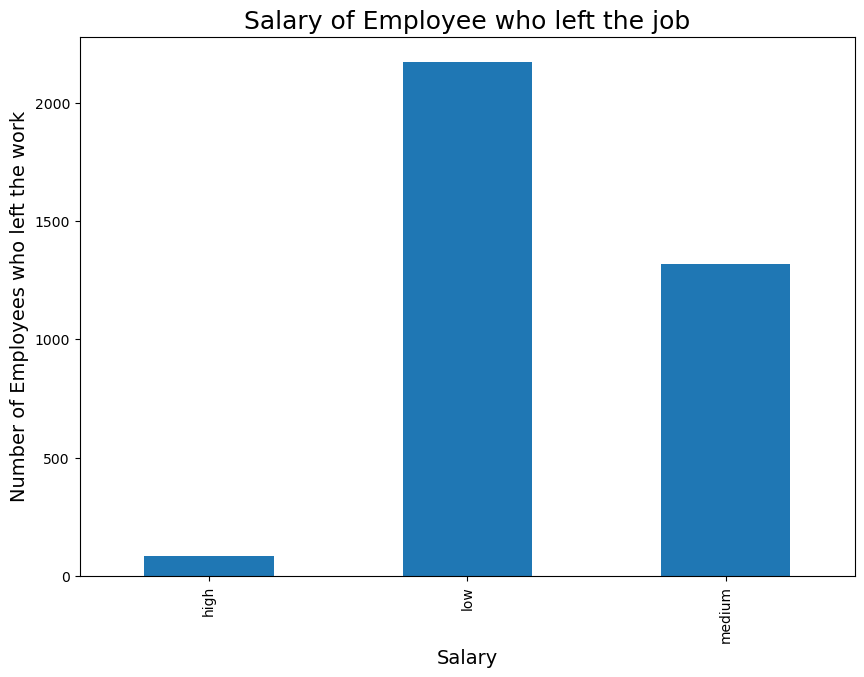

In [14]:
plt.figure(figsize=(10,7)),
df.groupby(['salary'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who left the work', fontsize=14)
plt.xlabel('Salary', fontsize =14)
plt.title("Salary of Employee who left the job",fontsize=18)
plt.show()

It can be clearly seen that most of the employees who left the job were earning low income or medium income and very less proportion of employees are there who left their job and were earning hign income. This implies that Salary is a major factor in determining the Employee Retention.

### TRAINING THE MODEL

##### Training Process
Now we will splits features(x) and target(y)

In [15]:
df = df.drop('Work_accident', axis=1)

Treating Categorical Values

In [34]:
df2 = pd.get_dummies(df)

In [36]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
x = df2.iloc[:,1:]
y = df2["left"]

In [38]:
x.drop("left",axis=1)

,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [39]:
x

,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.48,2,160,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.53,2,143,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.96,6,280,4,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [40]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

#### now we will perform Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In the above code i have just imported the train_test_split model and applied the model to the dataset in 70:30 ratio so that machine will take learning from 70% of the data and make a testing on 30% of the data and hence make a optimum conclusion

#### Checking sizes of data to know whether they are split correctly

In [42]:
# Shape of train set
print(x_train.shape)

# Shape of test set
print(x_test.shape)

(11249, 19)
(3750, 19)


In [43]:
print(y_train.shape)
print(y_test.shape)

(11249,)
(3750,)


### Model Building

In [44]:
# import Library for Scaling
from sklearn.preprocessing import StandardScaler


# Applying Feature Scaling on our data for better model prediction
sc = StandardScaler()
x_train = sc.fit_transform(x_train)   
x_test = sc.transform(x_test)

In [47]:
# import Library for Model Building
from sklearn.linear_model import LogisticRegression

# applying logistic regression because it has probability type output
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)


In [53]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [54]:
print("Acuracy of the model :",ac)
print('Confusion matrix :\n',cm)
print('Classification report\n',cr)

Acuracy of the model : 1.0
Confusion matrix :
 [[2881    0]
 [   0  869]]
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2881
           1       1.00      1.00      1.00       869

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



Therefore our Model can work with an accuracy of 100%

### Conclusion

Hence we can use this model for Job Prediction (i.e we can predict whether an Employee will leave a job or not) with an accuracy of 100%